In [1]:
import os
from pathlib import Path

import seaborn as sns

In [2]:
DATA_DIR = Path("/home/sam/howest/howest-dl/udemy_1/TF_2_Notebooks_and_Data/04-CNNs/cell_images")
if DATA_DIR.is_dir():
    print(f"{DATA_DIR} is OK")
else:
    print(f"{DATA_DIR} is not a Directory")
    

/home/sam/howest/howest-dl/udemy_1/TF_2_Notebooks_and_Data/04-CNNs/cell_images is OK


In [3]:
p = DATA_DIR.glob("*")
dirs = [x for x in p if x.is_dir()]
print(dirs)

[PosixPath('/home/sam/howest/howest-dl/udemy_1/TF_2_Notebooks_and_Data/04-CNNs/cell_images/train'), PosixPath('/home/sam/howest/howest-dl/udemy_1/TF_2_Notebooks_and_Data/04-CNNs/cell_images/test')]


In [4]:
os.listdir(DATA_DIR)

['train', 'test']

In [5]:
TEST_PATH = DATA_DIR / Path("test")
TRAIN_PATH = DATA_DIR / Path("train")

os.listdir(TEST_PATH)

['infected', 'uninfected']

In [6]:
os.listdir(TRAIN_PATH / Path("01_infected"))[0]

'C129P90ThinF_IMG_20151004_134944_cell_27.png'

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.image import imread

(148, 142, 3)


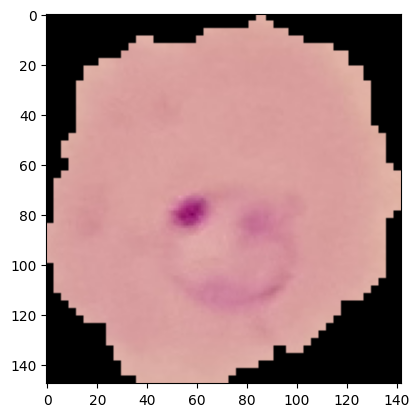

In [8]:
infected_cell = TRAIN_PATH / Path("01_infected/C100P61ThinF_IMG_20150918_144104_cell_162.png")

image_infected = imread(infected_cell)
print(image_infected.shape)
plt.imshow(image_infected)

(139, 160, 3)
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


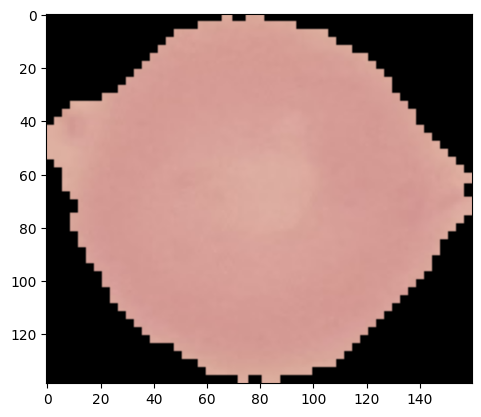

In [9]:
uninfected_cell = TRAIN_PATH / Path("00_uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")

image_uninfected = imread(uninfected_cell)
print(image_uninfected.shape)
print(image_uninfected)
plt.imshow(image_uninfected)

In [10]:
dim_width = []
dim_height = []

test_uninfected_dir = TEST_PATH / Path("uninfected")
for f in test_uninfected_dir.iterdir():
    img = plt.imread(f)
    w, h, colors = img.shape
    dim_width.append(w)
    dim_height.append(h)

print(len(dim_width), dim_width[0:20])
print(len(dim_height), dim_height[0:20])
print(np.mean(dim_width))
print(np.mean(dim_height))

1300 [121, 130, 157, 133, 124, 163, 145, 127, 130, 145, 145, 112, 124, 133, 106, 124, 127, 103, 139, 130]
1300 [175, 112, 139, 124, 148, 124, 121, 130, 181, 169, 139, 106, 121, 142, 109, 118, 130, 94, 136, 127]
130.92538461538462
130.75


Text(37.722222222222214, 0.5, 'YYY')

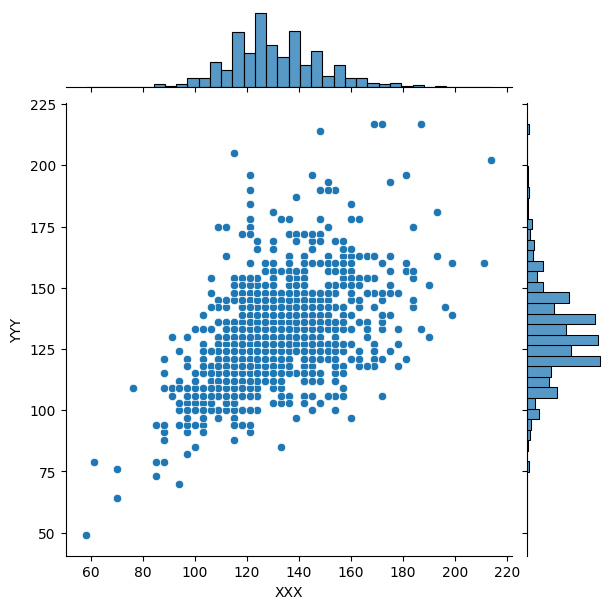

In [11]:
p1 = sns.jointplot(x=dim_width, y=dim_height)
p1.ax_joint.set_xlabel("XXX")
p1.ax_joint.set_ylabel("YYY")

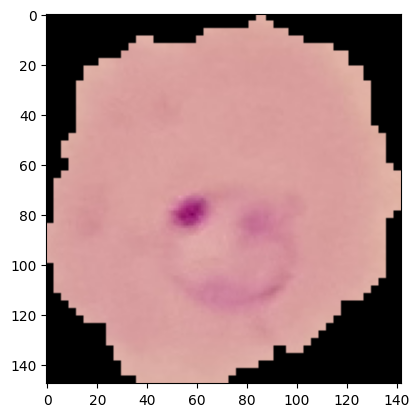

In [12]:
# Further playng with image attributes

testing_image_path = TRAIN_PATH / Path("01_infected/C100P61ThinF_IMG_20150918_144104_cell_162.png")

testing_image = imread(testing_image_path)
plt.imshow(testing_image)


In [13]:
print(testing_image.shape)

# p1 = sns.jointplot(x=np.arange(testing_image.shape[0], y=testing_image)

(148, 142, 3)


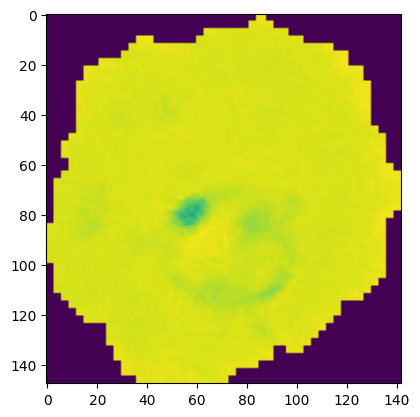

In [14]:
plt.imshow(testing_image[:,:,0])

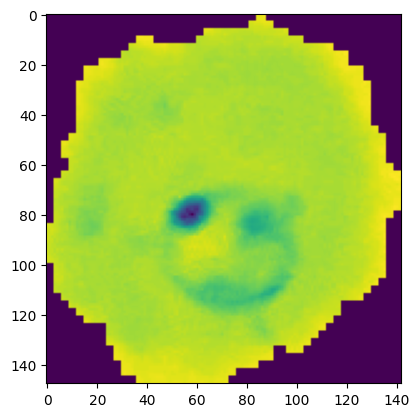

In [15]:
plt.imshow(testing_image[:,:,1])

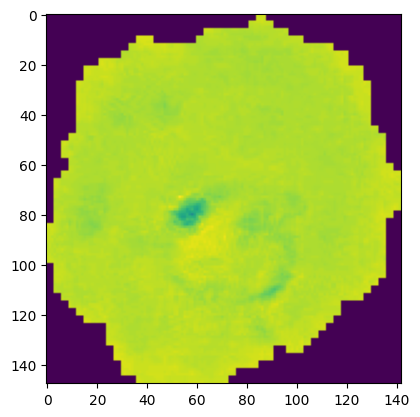

In [16]:
plt.imshow(testing_image[:,:,2])

In [17]:
print(testing_image.shape)
entries = testing_image.shape[0] * testing_image.shape[1]
w = np.arange(entries)
h = np.arange(entries)
r = testing_image[:,:,0].flatten()
print(len(w))
print(len(h))
print(len(r))
image_df = pd.DataFrame(data={
    "width": w,
    "height": h,
    "red": testing_image[:,:,0].flatten(),
    "green": testing_image[:,:,1].flatten(),
    "blue": testing_image[:,:,2].flatten(),
})

# sns.jointplot(data = image_df, x="width", y="red")
image_df


(148, 142, 3)
21016
21016
21016


,width,height,red,green,blue
0,0,0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0
2,2,2,0.0,0.0,0.0
3,3,3,0.0,0.0,0.0
4,4,4,0.0,0.0,0.0
...,...,...,...,...,...
21011,21011,21011,0.0,0.0,0.0
21012,21012,21012,0.0,0.0,0.0
21013,21013,21013,0.0,0.0,0.0
21014,21014,21014,0.0,0.0,0.0


In [18]:
image_df["rgb"] = image_df["red"] + image_df["green"] + image_df["blue"]
image_df

,width,height,red,green,blue,rgb
0,0,0,0.0,0.0,0.0,0.0
1,1,1,0.0,0.0,0.0,0.0
2,2,2,0.0,0.0,0.0,0.0
3,3,3,0.0,0.0,0.0,0.0
4,4,4,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
21011,21011,21011,0.0,0.0,0.0,0.0
21012,21012,21012,0.0,0.0,0.0,0.0
21013,21013,21013,0.0,0.0,0.0,0.0
21014,21014,21014,0.0,0.0,0.0,0.0


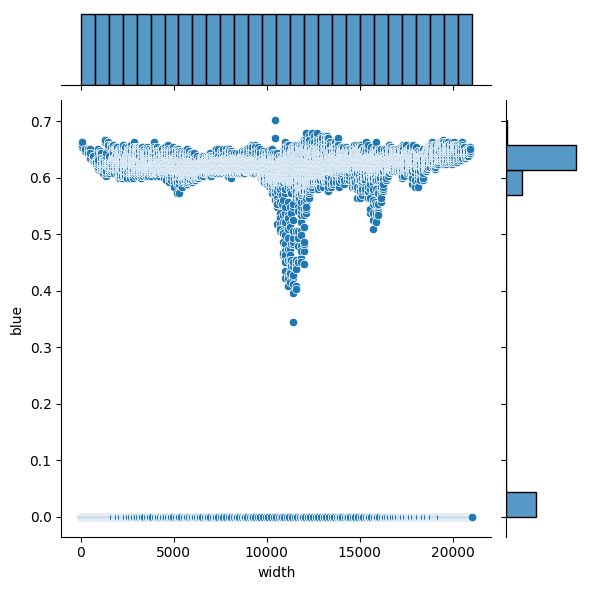

In [19]:
sns.jointplot(data = image_df, x="width", y="blue")

In [20]:
from pathlib import Path

import tensorflow

DATA_DIR = Path("/home/sam/howest/howest-dl/udemy_1/TF_2_Notebooks_and_Data/04-CNNs/cell_images")

train_ds, validation_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    directory=DATA_DIR / Path("train"),
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    color_mode="rgb",
    subset="both",
    image_size=(50, 50),
    shuffle=True,
    seed=123,
    batch_size=None,
)
print(type(train_ds))
print(train_ds.class_names)
      


2025-04-10 10:57:30.770908: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-10 10:57:30.859165: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744275450.904672  713753 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744275450.917639  713753 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-10 10:57:31.022398: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Found 24958 files belonging to 2 classes.
Using 19967 files for training.
Using 4991 files for validation.


I0000 00:00:1744275454.630787  713753 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3574 MB memory:  -> device: 0, name: NVIDIA RTX A3000 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>
['00_uninfected', '01_infected']


2025-04-10 09:44:56.492817: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-10 09:44:56.554097: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-10 09:44:56.671791: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-04-10 09:44:56.909152: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<Figure size 640x480 with 0 Axes>

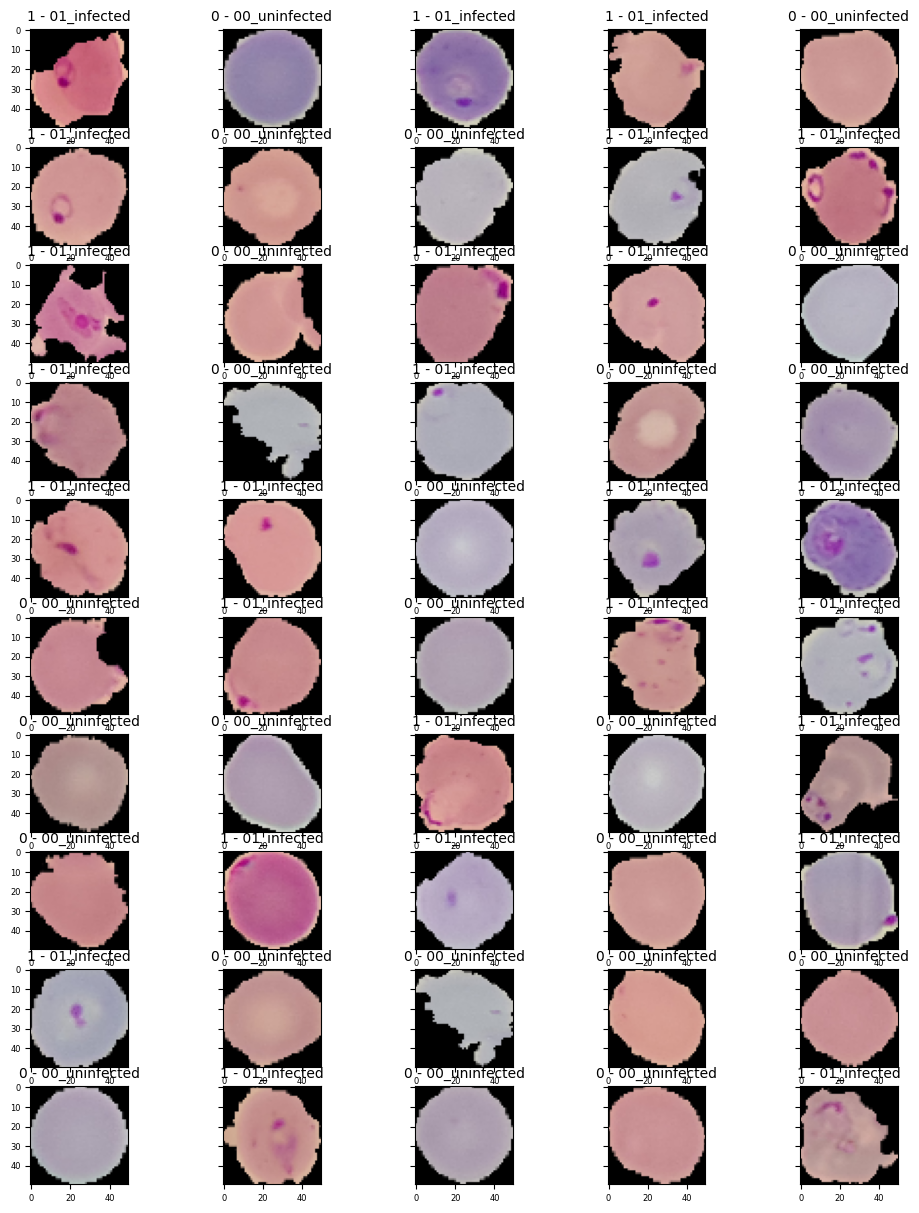

In [25]:
# Visualize the data
import matplotlib.pyplot as plt
# Some defaults for matplotlib
LARGE = 12
MEDIUM = 10
SMALL = 6
plt.tight_layout()
plt.rcParams.update({
    'axes.titlesize': MEDIUM,
    'legend.fontsize': SMALL,
    'figure.figsize': (5, 3),
    'axes.labelsize': MEDIUM,
    'axes.titlesize': MEDIUM,
    'xtick.labelsize': SMALL,
    'ytick.labelsize': SMALL,
    'figure.titlesize': LARGE
})


n_rows = 10
n_cols = 5
fig_vb, axes_vb = plt.subplots(n_rows, n_cols, figsize = (12, 15), sharey=True)

# ss = train_ds.take(1)
# print(ss)
for r in range(n_rows):
    c = 0
    for image, label in train_ds.take(n_cols):
        # print(image.shape, label.shape, label)
        axes_vb[r,c].imshow(image.numpy().astype("uint8"))
        axes_vb[r,c].set_title(f"{int(label)} - {train_ds.class_names[int(label)]}")
        c = c+1

In [28]:
ss = train_ds.take(1, "samsam")

In [29]:
type(ss)

tensorflow.python.data.ops.take_op._TakeDataset

In [30]:
import os
# for f in os.walk(DATA_DIR / Path("train")):
#     print(f)
print("XX")

XX


<class 'numpy.ndarray'> (256, 256)


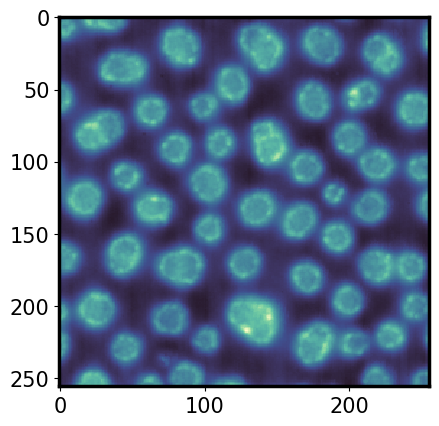

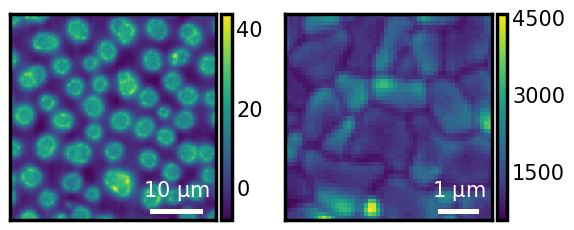

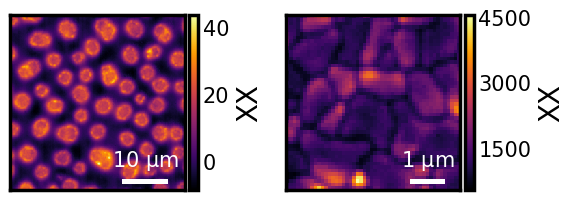

In [52]:
# Testing seaborn-image
import seaborn_image as isns
isns.set_context("notebook")

pol = isns.load_image("polymer")
print(type(pol), pol.shape)
plt.imshow(pol)
pl = isns.load_image("fluorescence")
g1 = isns.ImageGrid([pol, pl], cmap="viridis", dx=[0.15, 0.1], units="um")
g2 = isns.ImageGrid([pol, pl], cmap="inferno", dx=[0.15, 0.1], units="um", cbar_label="XX")

'-----'

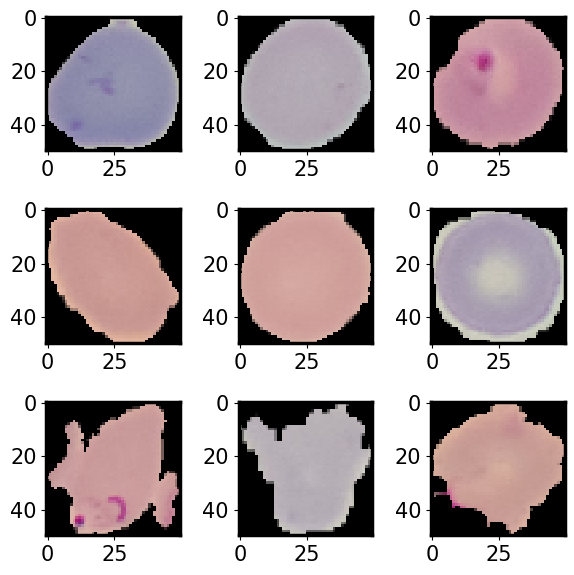

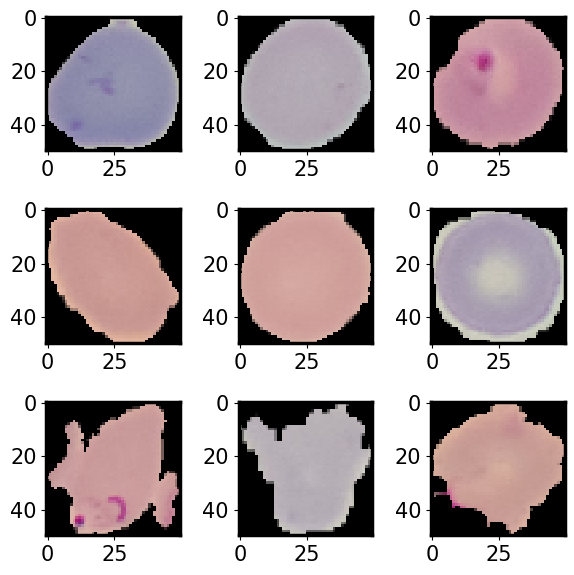

In [54]:
n_rows = 3
n_cols = 3
# fig_vb, axes_vb = plt.subplots(n_rows, n_cols, figsize = (12, 15), sharey=True)
# for r in range(n_rows):
#     c = 0
#     for image, label in train_ds.take(n_cols):
#         print("type_image", type(image))
#         # print(image.shape, label.shape, label)
#         axes_vb[r,c].imshow(image.numpy().astype("uint8"))
#         axes_vb[r,c].set_title(f"{int(label)} - {train_ds.class_names[int(label)]}")
#         c = c+1

imgs_list = []
lbl_list = []
for image, label in train_ds.take(n_rows * n_cols):
    xx = image.numpy().astype("uint8")
    # print(type(xx), xx.shape)
    # print(xx)
    imgs_list.append(xx)
    lbl_list.append(label)
g1 = isns.ImageGrid(ll, col_wrap = n_cols, height=2, cmap="inferno", cbar_label="XXX", showticks=True, origin="upper", robust=True)
display("-----")
g2 = isns.ImageGrid(ll, col_wrap = n_cols, height=2, cmap="inferno", cbar=True, cbar_label="XXX", showticks=True, origin="upper")

